<a href="https://colab.research.google.com/github/alexlib/algae_population_model/blob/master/notebooks/figure1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import numpy as np

from algae_population import *


SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [6]:
# %matplotlib tk

In [7]:
import pickle
# solutions = pickle.load(open('figure1.p','rb'))
solutions = pickle.load(open('figure2.p','rb'))

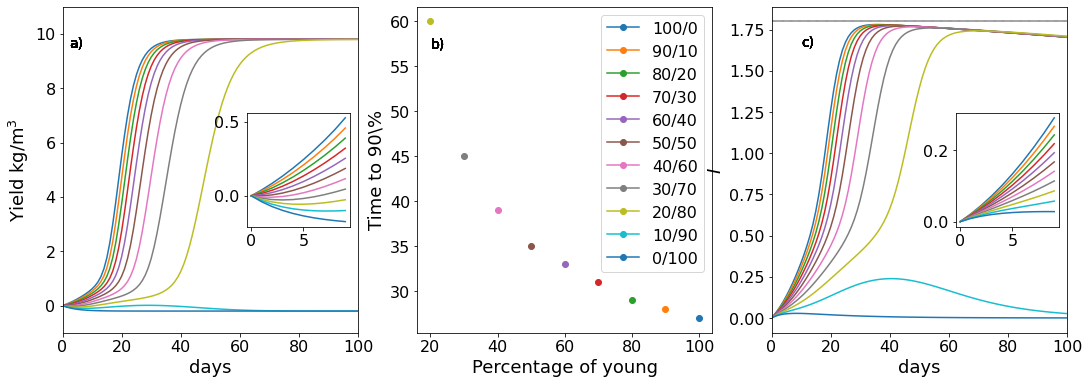

In [10]:
# def figure1(solutions, tend=None, K = 10):
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots(1,3,figsize=(18,6))

axins1 = inset_axes(ax[0], width="35%", height="35%",loc=7)
axins2 = inset_axes(ax[2], width="35%", height="35%",loc=7)

for sol in solutions:

    t0 = sol.t[0]    
    if tend is None:
        tend = sol.t[-1]

    if sol.t_events[0].size > 0 and sol.t_events[0] < tend:
        print(f'sporulation event at {sol.t_events[0]}')
        tend = sol.t_events[0]

    t = np.arange(t0, tend)
    z = sol.sol(t)

    # fig,ax = plt.subplots(1,3,figsize=(20,6))
    # ax[0].plot(t, z[:-1,:].T,'-o')
    # ax[0].set_ylabel('Age $a_i$')
    # ax[0].set_xlabel('days')
    # # ax[0].legend(['a0', 'a1', 'a2'], shadow=True)
    # ax[0].set_title('Population age evolution')

    
    
    # mass and inhibitor
    biomass = z[:-1, :] 
    I = z[-1,:]

    # what we gain is:
    _yield = np.sum( biomass.T - biomass[:,0], axis=1)
    

    ax[0].plot(t, _yield,'-',label = sol['s'][0])
    # _yield[_yield==0] = 0.001
    # ax[0].plot(t, np.log(_yield),'-o',label = sol['s'][0])
    ax[0].set_xlabel('days')
    ax[0].set_ylabel(r'Yield kg/m$^3$')
    # ax.set_title('Total biomass')
    ax[0].set_ylim([-1, 11])
    ax[0].set_xlim([0,100])
    # ax[0].set_yscale('symlog')
    # ax[0].legend()
    ax[0].text(2.1, 9.5, 'a)', size=14)


    axins1.plot(t[:10], _yield[:10],'-')
    # if sol.t_events[0].size > 0:
    #     ax[0].annotate('sporulation', xy=(tend, 0),  xycoords='data',
    #             xytext=(tend, 0.05),
    #             arrowprops=dict(arrowstyle="->",
    #                             connectionstyle="arc3", color='red')
    #             )

    ax[2].plot(t,I,'-',label= sol['s'][0])
    ax[2].set_xlabel('days')
    ax[2].set_ylabel(r'$I$')
    ax[2].plot([0,120],[1.8, 1.8],'k--',lw=0.1)
    ax[2].set_xlim([0,100])
    # ax[1].set_yscale('symlog')
    # ax[1].set_title("Inhibitor")
    ax[2].text(10,1.65, 'c)',fontsize=14)

    axins2.plot(t[:10], I[:10])

    ind = np.argmax(_yield >= 0.9*9.8)
    
    # the percentage of youngs 
    youngs = int(sol['s'][0].split('/')[0])
    # print(youngs)
    settling_time = t[ind]
    if settling_time == 0:
        settling_time = np.nan

    # ax[2].plot(t, np.cumsum(_yield)/biomass[:,0].sum(),'-',label = sol['s'][0])
    # if settling_time > 0:
    ax[1].plot(youngs, settling_time,'o-', label = sol['s'][0])
    # _yield[_yield==0] = 0.001
    # ax[0].plot(t, np.log(_yield),'-o',)
    ax[1].set_xlabel('Percentage of young')
    ax[1].set_ylabel(r'Time to 90\%')
    # ax[2].set_xlim([0,100])
    # ax.set_title('Total biomass')
    # ax[0].set_ylim([-1, 11])
    # ax[0].set_xlim([0,100])
    # ax[0].set_yscale('symlog')
    ax[1].legend()
    

    fmt = mpl.ticker.StrMethodFormatter("{x:g}")
    ax[0].yaxis.set_major_formatter(fmt)
    ax[0].yaxis.set_minor_formatter(fmt)

    ax[1].yaxis.set_major_formatter(fmt)
    ax[1].yaxis.set_minor_formatter(fmt)
    ax[1].text(20,57, 'b)',fontsize=14)
    # ax[0].legend(bbox_to_anchor=(1.5, 1.0))
                 
plt.show()
# return fig, ax

fig.savefig('figure2.png',dpi=300, bbox_inches='tight', 
               transparent=True,
               pad_inches=0)

In [9]:
settling_times = []
for sol in solutions:
    t0 = sol.t[0]    
    if tend is None:
        tend = sol.t[-1]

    if sol.t_events[0].size > 0 and sol.t_events[0] < tend:
        print(f'sporulation event at {sol.t_events[0]}')
        tend = sol.t_events[0]

    t = np.arange(t0, tend)
    z = sol.sol(t)
    
    # mass and inhibitor
    biomass = z[:-1, :] 
    I = z[-1,:]

    # what we gain is:
    _yield = np.sum( biomass.T - biomass[:,0], axis=1)
    ind = np.argmax(_yield >= 0.9*9.8)
    
    youngs = int(sol['s'][0].split('/')[0])
    print(youngs)
    settling_time = t[ind]
    
    if settling_time == 0:
        settling_time = np.nan

    settling_times.append(settling_time)


100
90
80
70
60
50
40
30
20
10
0
